### This notebook is for building a Recurrent Neural Network (LSTM) to detect the genre of a song based only on its Audio features
### Since the model only utilizes the Audio features and does not take into account the Theme features, its architecture will be more straightforward and less complex than a Split Neural Network

In [22]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


Load the data and verify its shape

In [23]:
musicFeatures = pd.read_pickle("./musicFeatures_med_250/musicFeatures.pkl")  

In [24]:
print(f"shape of dataset: {musicFeatures.shape}\n")

musicFeatures.head(3)

shape of dataset: (26900, 22)



,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [25]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>



Split data in X and y dataset

Also, dropping the 'id' and theme features from the X dataset

In [26]:
#Spliting x and y

y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id','themeFeature_0','themeFeature_1','themeFeature_2','themeFeature_3','themeFeature_4'],axis =1)

print(x.shape)
print(y.shape)

(26900, 15)
(26900,)


The convertTo3DnpArray() function in the cell below is used to reshape the data. 

The data is currently in tabular form where each cell is 250 length numpy vector. We're reshaping the data from 4 dimensions to 3 dimensions for our use case.

In [27]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

In [28]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())




Final Sizes of all datasets
x_train : (21520, 15)
x_test : (2690, 15)
x_valid : (2690, 15)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64



Calling the convertTo3DnpArray() function to convert the X datasets to 3D numpy arrays

In [29]:
x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

In [11]:
ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)



Load keras and TensorFlow modules to start building the RNN's

In [12]:
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Flatten,concatenate,Dropout
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')


The plot_history() functions helps plot the training vs validation accuracy and training vs validation loss across all epochs of the model training process

In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()


This following Recurrent Neural Network architecture will serve as the baseline for RNN (LSTM) models since it is a relatively simple architecture


Height of the architecture - 5 layers between Input and Output layers - 2 LSTM and 3 dense layers


Width of the architecture - Designed in a non-increasing style with the max width being 64 and min width being 16 exluding the Input and Output layers


Regularization - None

In [22]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')



#Audio layer
audio_LSTM1 = LSTM(64,return_sequences=True)(audio_in)
audio_LSTM2 = LSTM(64)(audio_LSTM1)


#Concatenation 
dense1 = Dense(64, activation='relu')(audio_LSTM2)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model = Model(inputs=[audio_in], outputs=[op])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 audio_in (InputLayer)       [(None, 250, 15)]         0         
                                                                 
 lstm (LSTM)                 (None, 250, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 op (Dense)                  (None, 7)                 119   


The simple RNN model's performance is not good


It shows clear signs of overfitting, where the Training acccuracy keeps on increasing well beyong 80% but the Validation accuracy stagnates at around 55% just after the 10th epoch

Note - See plotted graphs in the output of the following cell

Epoch 1/50
673/673 [==============================] - 159s 230ms/step - loss: 1.6287 - accuracy: 0.3830 - val_loss: 1.5654 - val_accuracy: 0.4037
Epoch 2/50
673/673 [==============================] - 180s 268ms/step - loss: 1.5119 - accuracy: 0.4295 - val_loss: 1.5207 - val_accuracy: 0.4201
Epoch 3/50
673/673 [==============================] - 182s 270ms/step - loss: 1.4594 - accuracy: 0.4569 - val_loss: 1.4972 - val_accuracy: 0.4323
Epoch 4/50
673/673 [==============================] - 188s 279ms/step - loss: 1.4396 - accuracy: 0.4669 - val_loss: 1.4395 - val_accuracy: 0.4651
Epoch 5/50
673/673 [==============================] - 189s 280ms/step - loss: 1.3757 - accuracy: 0.4915 - val_loss: 1.4036 - val_accuracy: 0.4818
Epoch 6/50
673/673 [==============================] - 194s 288ms/step - loss: 1.3428 - accuracy: 0.5091 - val_loss: 1.3860 - val_accuracy: 0.4818
Epoch 7/50
673/673 [==============================] - 190s 282ms/step - loss: 1.3111 - accuracy: 0.5191 - val_loss: 1.3517 -

INFO:tensorflow:Assets written to: simple_rnn_model\assets


INFO:tensorflow:Assets written to: simple_rnn_model\assets


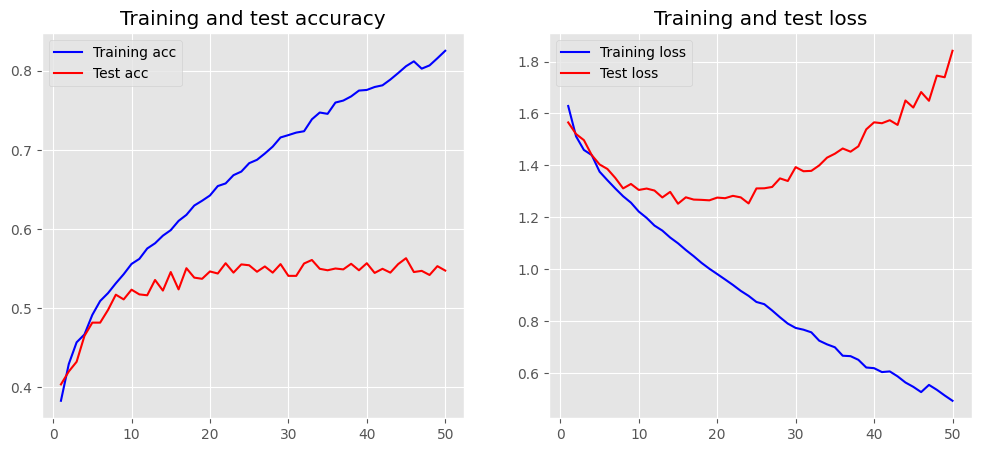

In [23]:
model.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h=model.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model.save('simple_rnn_model')


plot_history(h)


Calling the next model as 'model2'


Increasing the complexity of the RNN(LSTM) model to get better validation accuracy


Height of the architecture - 6 layers between Input and Output layers - 2 LSTM and 4 dense layers


Width of the architecture - Max width - 128 and min width 16 excluding the Input and Output layers. The width decreases intially and then increases in between to decrease again


Regularization - None

In [24]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')



#Audio layer
audio_LSTM1 = LSTM(128,return_sequences=True)(audio_in)
audio_LSTM2 = LSTM(64)(audio_LSTM1)
audio_dense = Dense(64, activation='relu')(audio_LSTM2)


#Concatenation 
dense1 = Dense(128, activation='relu')(audio_dense)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model2 = Model(inputs=[audio_in], outputs=[op])

model2.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 audio_in (InputLayer)       [(None, 250, 15)]         0         
                                                                 
 lstm_2 (LSTM)               (None, 250, 128)          73728     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 16)                528 


Training initially for 50 epochs show that it has better validation accuracy (around 60%) compared to the first model with potential for higher accuracy since the training accuracy still has an increasing trend and is below 90%


Epoch 1/50
673/673 [==============================] - 334s 491ms/step - loss: 1.6081 - accuracy: 0.3850 - val_loss: 1.5435 - val_accuracy: 0.4182
Epoch 2/50
673/673 [==============================] - 285s 423ms/step - loss: 1.4846 - accuracy: 0.4464 - val_loss: 1.4663 - val_accuracy: 0.4628
Epoch 3/50
673/673 [==============================] - 270s 402ms/step - loss: 1.4256 - accuracy: 0.4745 - val_loss: 1.4209 - val_accuracy: 0.4758
Epoch 4/50
673/673 [==============================] - 275s 409ms/step - loss: 1.3692 - accuracy: 0.4945 - val_loss: 1.3782 - val_accuracy: 0.5078
Epoch 5/50
673/673 [==============================] - 274s 407ms/step - loss: 1.3229 - accuracy: 0.5142 - val_loss: 1.3378 - val_accuracy: 0.5030
Epoch 6/50
673/673 [==============================] - 247s 367ms/step - loss: 1.2856 - accuracy: 0.5280 - val_loss: 1.3406 - val_accuracy: 0.5190
Epoch 7/50
673/673 [==============================] - 269s 400ms/step - loss: 1.2529 - accuracy: 0.5405 - val_loss: 1.2847 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers\assets


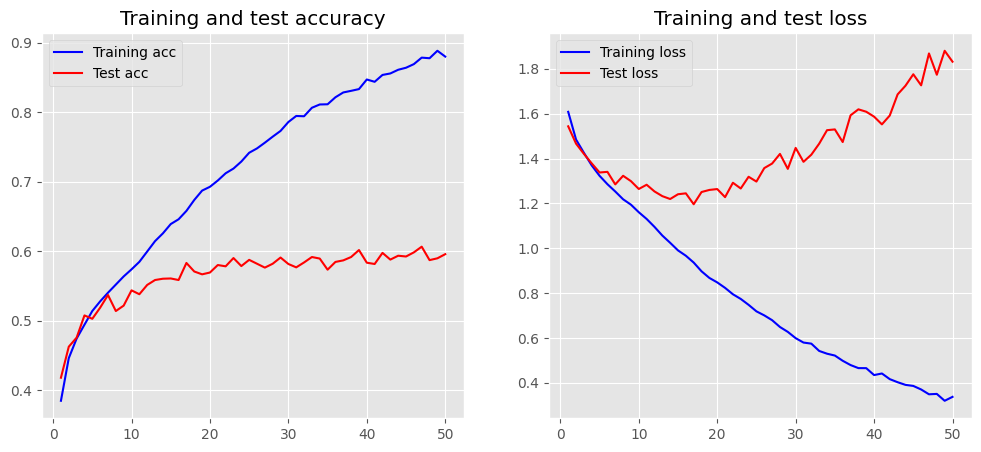

In [26]:
model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h2=model2.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model2.save('rnn_model_2lstm_4dense_layers')


plot_history(h2)


Continuing the training for 'model2' by additional 30 epochs to find the max validation accuracy possible


At the end of the continued training it is apparent the model is again overfitting with a training accuracy of ~94% and validation accuracy of ~60%

Epoch 1/30
673/673 [==============================] - 243s 361ms/step - loss: 0.3326 - accuracy: 0.8825 - val_loss: 1.7834 - val_accuracy: 0.5907
Epoch 2/30
673/673 [==============================] - 245s 364ms/step - loss: 0.3167 - accuracy: 0.8895 - val_loss: 1.9017 - val_accuracy: 0.6048
Epoch 3/30
673/673 [==============================] - 239s 355ms/step - loss: 0.3120 - accuracy: 0.8905 - val_loss: 2.0506 - val_accuracy: 0.5866
Epoch 4/30
673/673 [==============================] - 250s 371ms/step - loss: 0.2970 - accuracy: 0.8965 - val_loss: 1.9084 - val_accuracy: 0.5944
Epoch 5/30
673/673 [==============================] - 244s 362ms/step - loss: 0.2892 - accuracy: 0.8993 - val_loss: 1.9405 - val_accuracy: 0.5848
Epoch 6/30
673/673 [==============================] - 223s 331ms/step - loss: 0.2807 - accuracy: 0.9007 - val_loss: 1.9558 - val_accuracy: 0.5944
Epoch 7/30
673/673 [==============================] - 18442s 27s/step - loss: 0.2770 - accuracy: 0.9020 - val_loss: 2.0552 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_cont1\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_cont1\assets


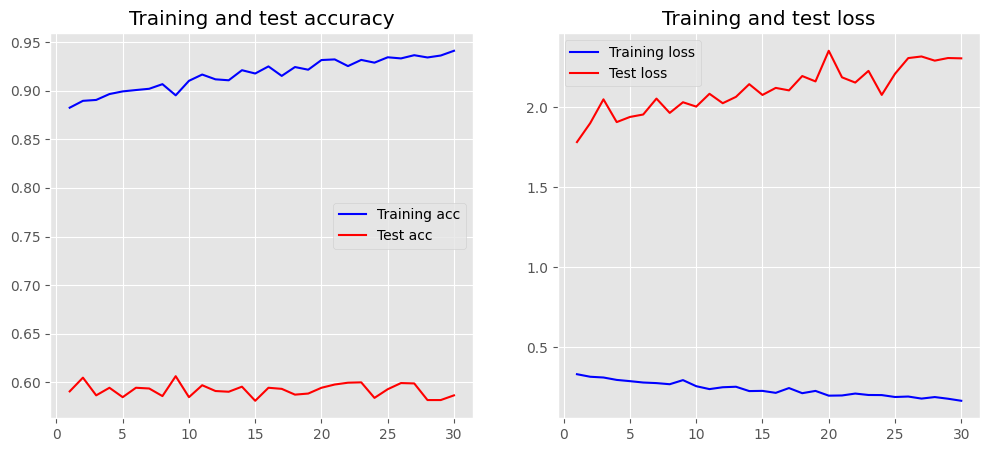

In [27]:
#continuing the training 

h2=model2.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=30, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model2.save('rnn_model_2lstm_4dense_layers_cont1')


plot_history(h2)


The next model will be called as 'model3'


Increasing the complexity of the model by introducing dropout regularization in the dense layers


Height of the architecture - 6 layers - 2 LSTM and 4 dense layes


Width of the architecture - max width = 128 and min width = 16


Regulazation - inluding dropout of 0.2 in the dense1 layer

In [28]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')



#Audio layer
audio_LSTM1 = LSTM(128,return_sequences=True,dropout=0.1)(audio_in)
audio_LSTM2 = LSTM(64,recurrent_dropout=0.1)(audio_LSTM1)
audio_dense = Dense(64, activation='relu')(audio_LSTM2)


dense1 = Dense(64, activation='relu')(audio_dense)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model3 = Model(inputs=[audio_in], outputs=[op])

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 audio_in (InputLayer)       [(None, 250, 15)]         0         
                                                                 
 lstm_4 (LSTM)               (None, 250, 128)          73728     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080


Initial training for 50 epochs shows that unlike the previous two models, the model is not easily overfitting with training accuracy of ~73% and validation accuracy of ~56%


Will be continuing the training for additional 50 epochs

Epoch 1/50
673/673 [==============================] - 485s 709ms/step - loss: 1.6596 - accuracy: 0.3636 - val_loss: 1.7000 - val_accuracy: 0.3691
Epoch 2/50
673/673 [==============================] - 460s 683ms/step - loss: 1.5237 - accuracy: 0.4329 - val_loss: 1.5470 - val_accuracy: 0.4182
Epoch 3/50
673/673 [==============================] - 405s 602ms/step - loss: 1.4847 - accuracy: 0.4523 - val_loss: 1.4859 - val_accuracy: 0.4457
Epoch 4/50
673/673 [==============================] - 385s 572ms/step - loss: 1.4405 - accuracy: 0.4743 - val_loss: 1.4561 - val_accuracy: 0.4721
Epoch 5/50
673/673 [==============================] - 372s 552ms/step - loss: 1.4114 - accuracy: 0.4823 - val_loss: 1.4048 - val_accuracy: 0.4911
Epoch 6/50
673/673 [==============================] - 360s 535ms/step - loss: 1.3682 - accuracy: 0.5013 - val_loss: 1.3746 - val_accuracy: 0.4978
Epoch 7/50
673/673 [==============================] - 410s 609ms/step - loss: 1.3450 - accuracy: 0.5066 - val_loss: 1.3920 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout\assets


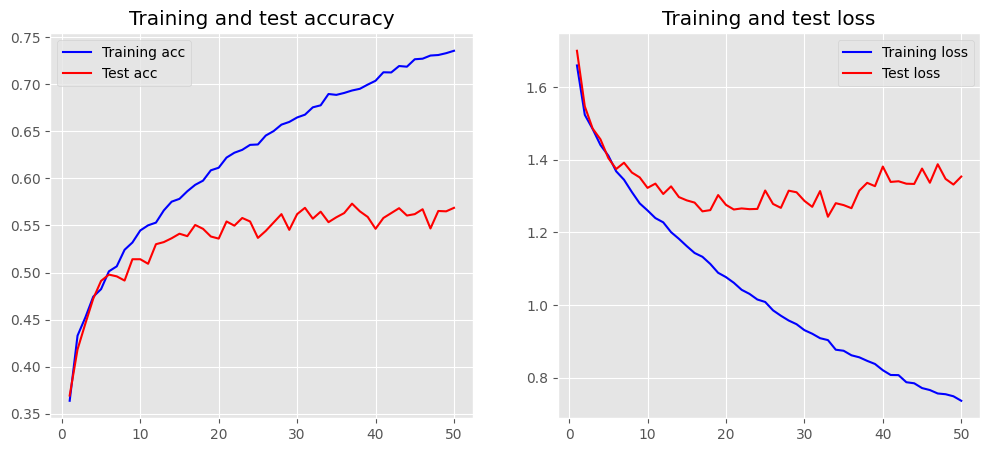

In [29]:
model3.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h3=model3.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model3.save('rnn_model_2lstm_4dense_layers_with_dropout')


plot_history(h3)

In [33]:
model3.save('rnn_model_2lstm_4dense_layers_with_dropout')

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout\assets



Continued training for 50 epochs still shows potential for improvement in validation accuracy which is touching ~60% while the training accuracy is ~82%


Will be continuing the training for another 50 epochs

Epoch 1/50
673/673 [==============================] - 319s 473ms/step - loss: 0.7284 - accuracy: 0.7410 - val_loss: 1.4552 - val_accuracy: 0.5465
Epoch 2/50
673/673 [==============================] - 314s 466ms/step - loss: 0.7193 - accuracy: 0.7453 - val_loss: 1.3399 - val_accuracy: 0.5770
Epoch 3/50
673/673 [==============================] - 310s 460ms/step - loss: 0.7101 - accuracy: 0.7440 - val_loss: 1.4016 - val_accuracy: 0.5706
Epoch 4/50
673/673 [==============================] - 311s 463ms/step - loss: 0.7026 - accuracy: 0.7515 - val_loss: 1.4256 - val_accuracy: 0.5599
Epoch 5/50
673/673 [==============================] - 318s 472ms/step - loss: 0.6917 - accuracy: 0.7544 - val_loss: 1.3872 - val_accuracy: 0.5751
Epoch 6/50
673/673 [==============================] - 323s 480ms/step - loss: 0.6879 - accuracy: 0.7553 - val_loss: 1.4195 - val_accuracy: 0.5844
Epoch 7/50
673/673 [==============================] - 312s 463ms/step - loss: 0.6857 - accuracy: 0.7582 - val_loss: 1.4219 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont\assets


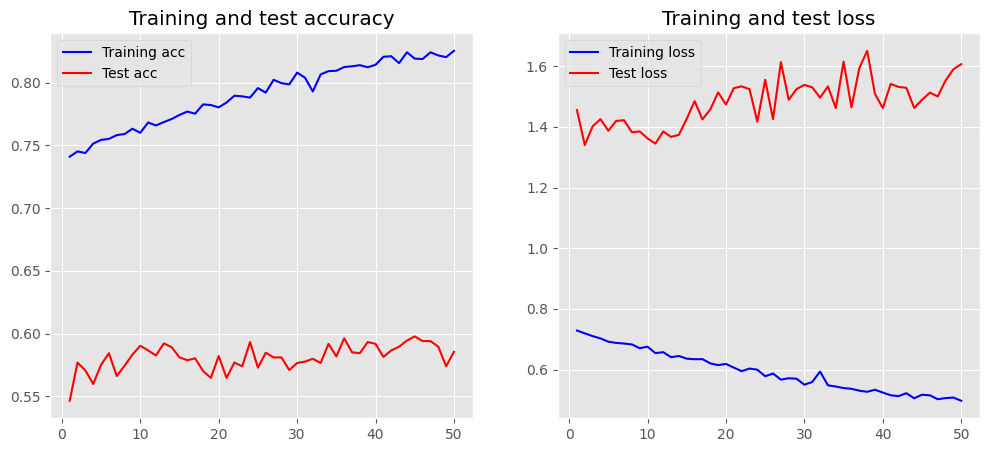

In [34]:
#continuing the training 

h3=model3.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model3.save('rnn_model_2lstm_4dense_layers_with_dropout_cont')


plot_history(h3)


Continued training for 50 epochs still shows potential for improvement in validation accuracy which is touching ~60% while the training accuracy is ~86%


Will be continuing the training for another 30 epochs

Epoch 1/50
673/673 [==============================] - 361s 537ms/step - loss: 0.4954 - accuracy: 0.8279 - val_loss: 1.5378 - val_accuracy: 0.5870
Epoch 2/50
673/673 [==============================] - 361s 537ms/step - loss: 0.4859 - accuracy: 0.8297 - val_loss: 1.5614 - val_accuracy: 0.5814
Epoch 3/50
673/673 [==============================] - 362s 538ms/step - loss: 0.4964 - accuracy: 0.8248 - val_loss: 1.5211 - val_accuracy: 0.5926
Epoch 4/50
673/673 [==============================] - 361s 536ms/step - loss: 0.4743 - accuracy: 0.8343 - val_loss: 1.6655 - val_accuracy: 0.5717
Epoch 5/50
673/673 [==============================] - 360s 535ms/step - loss: 0.4796 - accuracy: 0.8307 - val_loss: 1.6304 - val_accuracy: 0.5881
Epoch 6/50
673/673 [==============================] - 365s 543ms/step - loss: 0.4849 - accuracy: 0.8304 - val_loss: 1.5367 - val_accuracy: 0.5948
Epoch 7/50
673/673 [==============================] - 360s 536ms/step - loss: 0.4785 - accuracy: 0.8330 - val_loss: 1.4684 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part2\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part2\assets


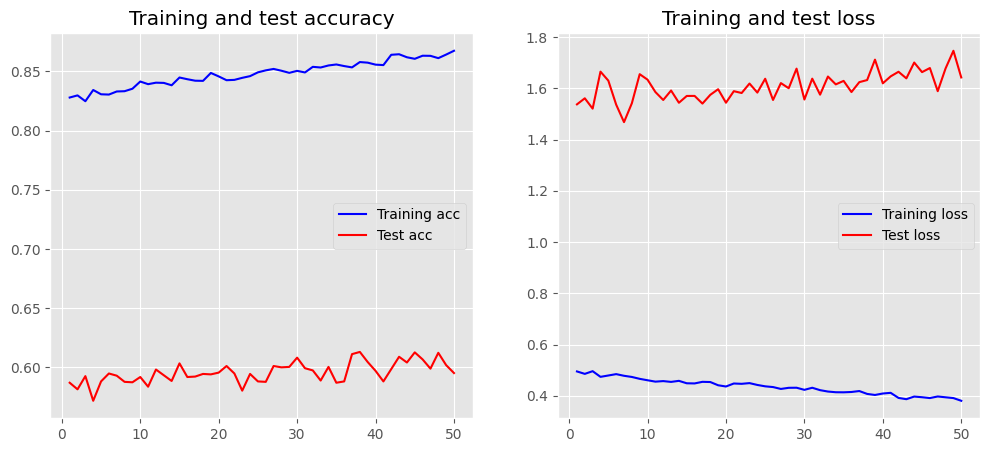

In [35]:
#continuing the training 

h3=model3.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model3.save('rnn_model_2lstm_4dense_layers_with_dropout_cont_part2')


plot_history(h3)


Continued training for 30 epochs still shows potential for improvement in validation accuracy which is touching ~61% while the training accuracy is ~87%


Will be continuing the training for another 30 epochs

Epoch 1/30
673/673 [==============================] - 304s 452ms/step - loss: 0.3864 - accuracy: 0.8640 - val_loss: 1.6233 - val_accuracy: 0.6007
Epoch 2/30
673/673 [==============================] - 306s 454ms/step - loss: 0.3818 - accuracy: 0.8702 - val_loss: 1.7291 - val_accuracy: 0.5978
Epoch 3/30
673/673 [==============================] - 303s 451ms/step - loss: 0.3908 - accuracy: 0.8627 - val_loss: 1.6303 - val_accuracy: 0.6030
Epoch 4/30
673/673 [==============================] - 303s 450ms/step - loss: 0.3717 - accuracy: 0.8716 - val_loss: 1.6622 - val_accuracy: 0.6063
Epoch 5/30
673/673 [==============================] - 303s 451ms/step - loss: 0.3853 - accuracy: 0.8661 - val_loss: 1.7129 - val_accuracy: 0.6045
Epoch 6/30
673/673 [==============================] - 303s 450ms/step - loss: 0.3708 - accuracy: 0.8720 - val_loss: 1.6376 - val_accuracy: 0.6089
Epoch 7/30
673/673 [==============================] - 303s 450ms/step - loss: 0.3805 - accuracy: 0.8669 - val_loss: 1.6654 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part3\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part3\assets


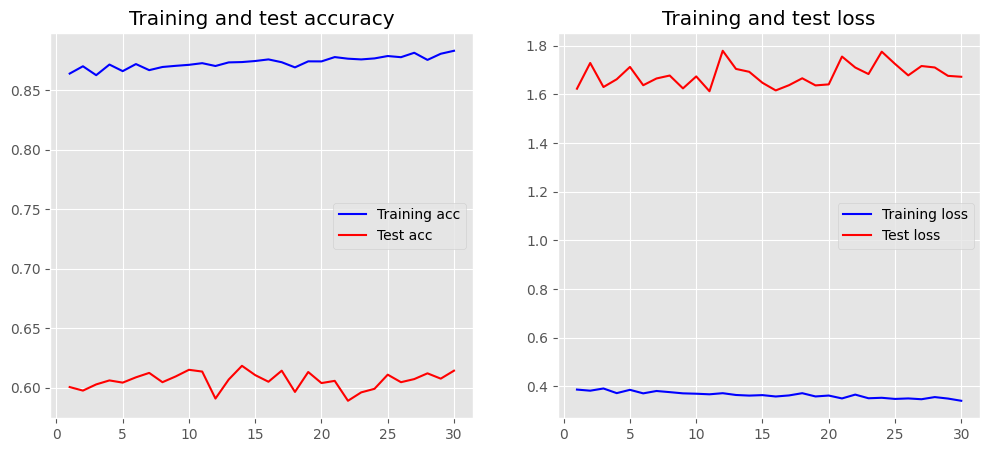

In [36]:
#continuing the training 

h3=model3.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=30, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model3.save('rnn_model_2lstm_4dense_layers_with_dropout_cont_part3')


plot_history(h3)


Continued training for 30 epochs still shows potential for improvement in validation accuracy which is touching ~63% while the training accuracy is ~89%


Will be continuing the training for another 30 epochs

Epoch 1/30
673/673 [==============================] - 305s 454ms/step - loss: 0.3381 - accuracy: 0.8826 - val_loss: 1.7058 - val_accuracy: 0.6078
Epoch 2/30
673/673 [==============================] - 338s 502ms/step - loss: 0.3412 - accuracy: 0.8825 - val_loss: 1.7004 - val_accuracy: 0.6171
Epoch 3/30
673/673 [==============================] - 333s 495ms/step - loss: 0.3445 - accuracy: 0.8821 - val_loss: 1.7099 - val_accuracy: 0.6048
Epoch 4/30
673/673 [==============================] - 302s 449ms/step - loss: 0.3291 - accuracy: 0.8875 - val_loss: 1.7330 - val_accuracy: 0.6234
Epoch 5/30
673/673 [==============================] - 302s 449ms/step - loss: 0.3376 - accuracy: 0.8830 - val_loss: 1.7690 - val_accuracy: 0.6164
Epoch 6/30
673/673 [==============================] - 334s 496ms/step - loss: 0.3299 - accuracy: 0.8867 - val_loss: 1.7304 - val_accuracy: 0.6156
Epoch 7/30
673/673 [==============================] - 437s 650ms/step - loss: 0.3311 - accuracy: 0.8828 - val_loss: 1.6824 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part4\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part4\assets


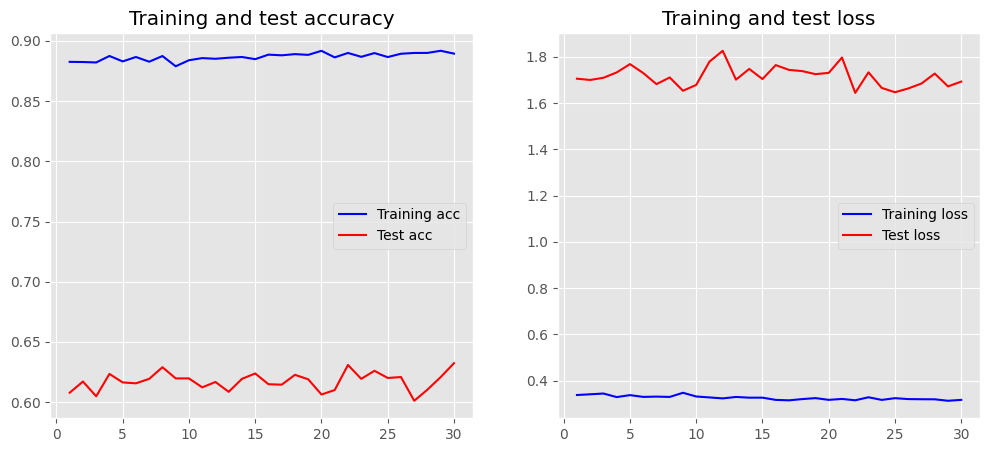

In [37]:
#continuing the training 

h3=model3.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=30, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model3.save('rnn_model_2lstm_4dense_layers_with_dropout_cont_part4')


plot_history(h3)


Continued training for 30 epochs still shows potential for improvement in validation accuracy which is touching ~62% while the training accuracy is ~90%


Since the trend seems to be inline with the best models for other Neural Network architectures(CNN and DNN) for audio data, with ~62% validation accuracy and over 90% training accuracy, this seems to be the best model possible for Audio only RNN (LSTM) networks 

Epoch 1/30
673/673 [==============================] - 427s 635ms/step - loss: 0.3123 - accuracy: 0.8896 - val_loss: 1.8181 - val_accuracy: 0.6219
Epoch 2/30
673/673 [==============================] - 429s 638ms/step - loss: 0.3319 - accuracy: 0.8849 - val_loss: 1.6909 - val_accuracy: 0.6108
Epoch 3/30
673/673 [==============================] - 425s 631ms/step - loss: 0.3114 - accuracy: 0.8906 - val_loss: 1.7477 - val_accuracy: 0.6138
Epoch 4/30
673/673 [==============================] - 399s 594ms/step - loss: 0.3027 - accuracy: 0.8938 - val_loss: 1.7797 - val_accuracy: 0.6138
Epoch 5/30
673/673 [==============================] - 394s 586ms/step - loss: 0.3055 - accuracy: 0.8937 - val_loss: 1.6660 - val_accuracy: 0.6156
Epoch 6/30
673/673 [==============================] - 396s 588ms/step - loss: 0.3076 - accuracy: 0.8917 - val_loss: 1.7208 - val_accuracy: 0.6186
Epoch 7/30
673/673 [==============================] - 393s 583ms/step - loss: 0.3105 - accuracy: 0.8921 - val_loss: 1.7167 -

INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part5\assets


INFO:tensorflow:Assets written to: rnn_model_2lstm_4dense_layers_with_dropout_cont_part5\assets


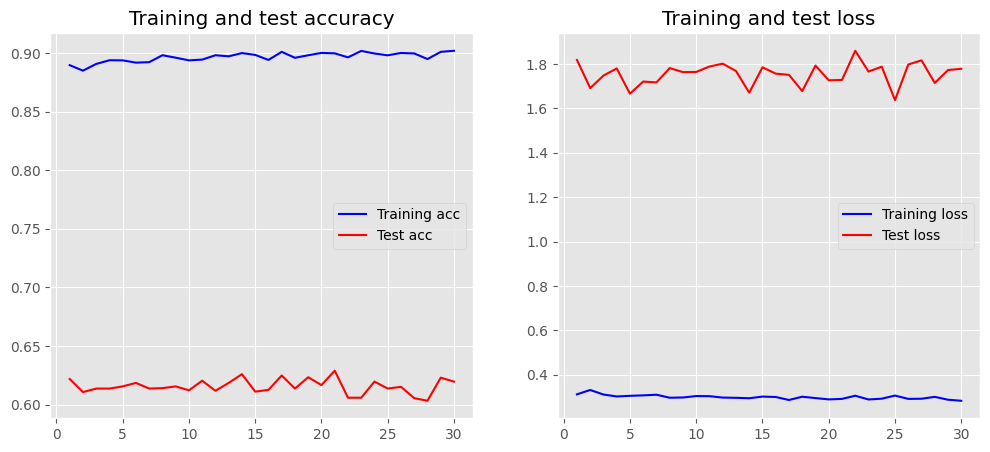

In [38]:
#continuing the training 

h3=model3.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=30, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model3.save('rnn_model_2lstm_4dense_layers_with_dropout_cont_part5')


plot_history(h3)

In [14]:
rnn_lstm_noTheme_best_model = load_model("rnn_model_2lstm_4dense_layers_with_dropout_cont_part5")

In [20]:
def accuracy_score(model_path):
    model = load_model(model_path)
    model_train = model.evaluate({'audio_in': x_train_audio},{'op': y_train})
    model_test = model.evaluate({'audio_in': x_test_audio},{'op': y_test})
    model_valid = model.evaluate({'audio_in': x_valid_audio},{'op': y_valid})
    print(f"train accuracy : {model_train[1]} | valid accuracy : {model_test[1]} | test accuracy : {model_valid[1]}")


The best model "rnn_model_2lstm_4dense_layers_with_dropout_cont_part5" gives training, validation and testing accuracy of ~89%, 62% and 62% respectively after 240 epochs of training

In [21]:
accuracy_score("rnn_model_2lstm_4dense_layers_with_dropout_cont_part5")

85/85 [==============================] - 10s 114ms/step - loss: 1.8282 - accuracy: 0.6201
train accuracy : 0.8903345465660095 | valid accuracy : 0.6197025775909424 | test accuracy : 0.6200743317604065



Best RNN(LSTM) network architecture for audio features only is 'rnn_model_2lstm_4dense_layers_with_dropout_cont_part5' -

Height - 6 (2 LSTM and 5 dense layers)


Width - max width = 128 and min width = 16 

Regularization - 0.2 dropout in second dense layer of width 64